## **Visão geral do mercado de trabalho em dados no Brasil**

A presente análise utiliza como fonte a [pesquisa](https://www.kaggle.com/datasets/datahackers/state-of-data-2022/data) realizada pela Data Hackers em parceria com a Bain & Company, entre outubro e novembro de 2022, com 4.271 respondentes de todo o país. 

O estudo abrangeu temas como perfil demográfico, formação, atuação profissional, remuneração, satisfação no trabalho e impacto do trabalho remoto. A amostra incluiu diversos papéis, como analistas, cientistas e engenheiros de dados, com diferentes níveis de experiência. 

O questionário foi dividido em 8 partes, abordando temas como dados demográficos, carreira, desafios dos gestores, conhecimentos na área, objetivos profissionais e habilidades específicas em Engenharia de Dados, Análise de Dados e Ciências de Dados.

### Processamento dos dados

In [87]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# carregando os dados
df_dados = pd.read_csv("State_of_data_2022.csv", sep=",", encoding="UTF-8")

# modificando o display da tela
configurando_display = {
    'max_columns': 999,
    'width': 4096,    
    'max_rows': 999,
    'precision': 2,
}

for op, value in configurando_display.items():
    pd.set_option("display.{}".format(op), value)

# exibindo as pimeiras 3 linhas do dataframe
df_dados.head(3)

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_1 ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_c ', 'Cor/raca/etnia')","('P1_d ', 'PCD')","('P1_e ', 'experiencia_profissional_prejudicada')","('P1_f ', 'aspectos_prejudicados')","('P1_g ', 'vive_no_brasil')","('P1_i ', 'Estado onde mora')","('P1_i_1 ', 'uf onde mora')","('P1_i_2 ', 'Regiao onde mora')","('P1_j ', 'Mudou de Estado?')","('P1_k ', 'Regiao de origem')","('P1_l ', 'Nivel de Ensino')","('P1_m ', 'Área de Formação')","('P2_a ', 'Qual sua situação atual de trabalho?')","('P2_b ', 'Setor')","('P2_c ', 'Numero de Funcionarios')","('P2_d ', 'Gestor?')","('P2_e ', 'Cargo como Gestor')","('P2_f ', 'Cargo Atual')","('P2_g ', 'Nivel')","('P2_h ', 'Faixa salarial')","('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')","('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')","('P2_k ', 'Você está satisfeito na sua empresa atual?')","('P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?')","('P2_l_1 ', 'Falta de oportunidade de crescimento no emprego atual')","('P2_l_2 ', 'Salário atual não corresponde ao mercado')","('P2_l_3 ', 'Não tenho uma boa relação com meu líder/gestor')","('P2_l_4 ', 'Gostaria de trabalhar em em outra área de atuação')","('P2_l_5 ', 'Gostaria de receber mais benefícios')","('P2_l_6 ', 'O clima de trabalho/ambiente não é bom')","('P2_l_7 ', 'Falta de maturidade analítica na empresa')","('P2_m ', 'Você participou de entrevistas de emprego nos últimos 6 meses?')","('P2_n ', 'Você pretende mudar de emprego nos próximos 6 meses?')","('P2_o ', 'Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?')","('P2_o_1 ', 'Remuneração/Salário')","('P2_o_2 ', 'Benefícios')","('P2_o_3 ', 'Propósito do trabalho e da empresa')","('P2_o_4 ', 'Flexibilidade de trabalho remoto')","('P2_o_5 ', 'Ambiente e clima de trabalho')","('P2_o_6 ', 'Oportunidade de aprendizado e trabalhar com referências na área')","('P2_o_7 ', 'Plano de carreira e oportunidades de crescimento profissional')","('P2_o_8 ', 'Maturidade da empresa em termos de tecnologia e dados')","('P2_o_9 ', 'Qualidade dos gestores e líderes')","('P2_o_10 ', 'Reputação que a empresa tem no mercado')","('P2_p ', 'Atualmente qual a sua forma de trabalho?')","('P2_q ', 'Qual a forma de trabalho ideal para você?')","('P2_r ', 'Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?')","('P2_s ', 'Sua empresa passu por Layoff em 2022?')","('P3_a ', 'Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?')","('P3_b ', 'Quais desses papéis/cargos fazem parte do time (ou chapter) de dados da sua empresa?')","('P3_b_1 ', 'Analytics Engineer')","('P3_b_2 ', 'Engenharia de Dados/Data Engineer')","('P3_b_3 ', 'Analista de Dados/Data Analyst')","('P3_b_4 ', 'Cientista de Dados/Data Scientist')","('P3_b_5 ', 'Database Administrator/DBA')","('P3_b_6 ', 'Analista de Business Intelligence/BI')","('P3_b_7 ', 'Arquiteto de Dados/Data Architect')","('P3_b_8 ', 'Data Product Manager/DPM')","('P3_b_9 ', 'Business Analyst')","('P3_c ', 'Quais dessas responsabilidades fazem parte da sua rotina atual de trabalho como gestor?')","('P3_c_1 ', 'Pensar na visão de longo prazo de dados da empresa e fortalecimento da cultura analítica da companhia.')","('P3_c_2 ', 'Organização de treinamentos e iniciativas com o objetivo de aumentar a maturidade analítica das áreas de negócios.')","('P3_c_3 ', 'Atração, seleção e contratação de talentos para o time de dados.')","('P3_c_4 ', 'Decisão sobre contratação de ferramentas e tecnologias relacionadas a dados.')","('P3_c_5 ', 'Sou gestor da equipe responsável pela engenharia de dados e por manter o Data Lake da empresa como fonte única dos dados, garantindo a qualidade e confiabilidade da informação.')","('P3_c_6 ', 'Sou gestor da equipe responsável pela entrega de dados, estudos, relatórios e dashboards para as

In [3]:
# verificando a quantidade de linhas e colunas
df_dados.shape

(4271, 353)

In [4]:
# removendo valores duplicados
df_dados.drop_duplicates(inplace=True)
df_dados.shape

(4270, 353)

In [5]:
# listando as colunas do dataframe
colunas_df = list(df_dados.columns)
colunas_df

["('P0', 'id')",
 "('P1_a ', 'Idade')",
 "('P1_a_1 ', 'Faixa idade')",
 "('P1_b ', 'Genero')",
 "('P1_c ', 'Cor/raca/etnia')",
 "('P1_d ', 'PCD')",
 "('P1_e ', 'experiencia_profissional_prejudicada')",
 "('P1_f ', 'aspectos_prejudicados')",
 "('P1_g ', 'vive_no_brasil')",
 "('P1_i ', 'Estado onde mora')",
 "('P1_i_1 ', 'uf onde mora')",
 "('P1_i_2 ', 'Regiao onde mora')",
 "('P1_j ', 'Mudou de Estado?')",
 "('P1_k ', 'Regiao de origem')",
 "('P1_l ', 'Nivel de Ensino')",
 "('P1_m ', 'Área de Formação')",
 "('P2_a ', 'Qual sua situação atual de trabalho?')",
 "('P2_b ', 'Setor')",
 "('P2_c ', 'Numero de Funcionarios')",
 "('P2_d ', 'Gestor?')",
 "('P2_e ', 'Cargo como Gestor')",
 "('P2_f ', 'Cargo Atual')",
 "('P2_g ', 'Nivel')",
 "('P2_h ', 'Faixa salarial')",
 "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')",
 "('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')",
 "('P2_k ', 'Você 

In [6]:
# excluindo colunas que não serão utilizadas
df_dados.drop(columns=[
    "('P3_a ', 'Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?')",
 "('P3_b ', 'Quais desses papéis/cargos fazem parte do time (ou chapter) de dados da sua empresa?')",
 "('P3_b_1 ', 'Analytics Engineer')",
 "('P3_b_2 ', 'Engenharia de Dados/Data Engineer')",
 "('P3_b_3 ', 'Analista de Dados/Data Analyst')",
 "('P3_b_4 ', 'Cientista de Dados/Data Scientist')",
 "('P3_b_5 ', 'Database Administrator/DBA')",
 "('P3_b_6 ', 'Analista de Business Intelligence/BI')",
 "('P3_b_7 ', 'Arquiteto de Dados/Data Architect')",
 "('P3_b_8 ', 'Data Product Manager/DPM')",
 "('P3_b_9 ', 'Business Analyst')",
 "('P3_c ', 'Quais dessas responsabilidades fazem parte da sua rotina atual de trabalho como gestor?')",
 "('P3_c_1 ', 'Pensar na visão de longo prazo de dados da empresa e fortalecimento da cultura analítica da companhia.')",
 "('P3_c_2 ', 'Organização de treinamentos e iniciativas com o objetivo de aumentar a maturidade analítica das áreas de negócios.')",
 "('P3_c_3 ', 'Atração, seleção e contratação de talentos para o time de dados.')",
 "('P3_c_4 ', 'Decisão sobre contratação de ferramentas e tecnologias relacionadas a dados.')",
 "('P3_c_5 ', 'Sou gestor da equipe responsável pela engenharia de dados e por manter o Data Lake da empresa como fonte única dos dados, garantindo a qualidade e confiabilidade da informação.')",
 "('P3_c_6 ', 'Sou gestor da equipe responsável pela entrega de dados, estudos, relatórios e dashboards para as áreas de negócio da empresa.')",
 "('P3_c_7 ', 'Sou gestor da equipe responsável por iniciativas e projetos envolvendo Inteligência Artificial e Machine Learning.')",
 "('P3_c_8 ', 'Apesar de ser gestor ainda atuo na parte técnica, construindo soluções/análises/modelos etc.')",
 "('P3_c_9 ', 'Gestão de projetos de dados, cuidando das etapas, equipes envolvidas, atingimento dos objetivos etc.')",
 "('P3_c_10 ', 'Gestão de produtos de dados, cuidando da visão dos produtos, backlog, feedback de usuários etc.')",
 "('P3_c_11 ', 'Gestão de pessoas, apoio no desenvolvimento das pessoas, evolução de carreira')",
 "('P3_d ', 'Quais são os 3 maiores desafios que você tem como gestor no atual momento?')",
 "('P3_d_1 ', 'a Contratar novos talentos.')",
 "('P3_d_2 ', 'b Reter talentos.')",
 "('P3_d_3 ', 'c Convencer a empresa a aumentar os investimentos na área de dados.')",
 "('P3_d_4 ', 'd Gestão de equipes no ambiente remoto.')",
 "('P3_d_5 ', 'e Gestão de projetos envolvendo áreas multidisciplinares da empresa.')",
 "('P3_d_6 ', 'f Organizar as informações e garantir a qualidade e confiabilidade.')",
 "('P3_d_7 ', 'g Conseguir processar e armazenar um alto volume de dados.')",
 "('P3_d_8 ', 'h Conseguir gerar valor para as áreas de negócios através de estudos e experimentos.')",
 "('P3_d_9 ', 'i Desenvolver e manter modelos Machine Learning em produção.')",
 "('P3_d_10 ', 'j Gerenciar a expectativa das áreas de negócio em relação as entregas das equipes de dados.')",
 "('P3_d_11 ', 'k Garantir a manutenção dos projetos e modelos em produção, em meio ao crescimento da empresa.')",
 "('P3_d_12 ', 'Conseguir levar inovação para a empresa através dos dados.')",
 "('P3_d_13 ', 'Garantir retorno do investimento (ROI) em projetos de dados.')",
 "('P3_d_14 ', 'Dividir o tempo entre entregas técnicas e gestão.')",
 "('P6_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual como engenheiro de dados?')",
 "('P6_a_1 ', 'Desenvolvo pipelines de dados utilizando linguagens de programação como Python, Scala, Java etc.')",
 "('P6_a_2 ', 'Realizo construções de ETL's em ferramentas como Pentaho, Talend, Dataflow etc.')",
 "('P6_a_3 ', 'Crio consultas através da linguagem SQL para exportar informações e compartilhar com as áreas de negócio.')",
 "('P6_a_4 ', 'Atuo na integração de diferentes fontes de dados através de plataformas proprietárias como Stitch Data, Fivetran etc.')",
 "('P6_a_5 ', 'Modelo soluções de arquitetura de dados, criando componentes de ingestão de dados, transformação e recuperação da informação.')",
 "('P6_a_6 ', 'Desenvolvo/cuido da manutenção de repositórios de dados baseados em streaming de eventos como Data Lakes e Data Lakehouses.')",
 "('P6_a_7 ', 'Atuo na modelagem dos dados, com o objetivo de criar conjuntos de dados como Data Warehouses, Data Marts etc.')",
 "('P6_a_8 ', 'Cuido da qualidade dos dados, metadados e dicionário de dados.')",
 "('P6_a_9 ', 'Nenhuma das opções listadas refletem meu dia a dia.')",
 "('P6_b ', 'Quais as ferramentas/tecnologias de ETL que você utiliza no trabalho como Data Engineer?')",
 "('P6_b_1 ', 'Scripts Python')",
 "('P6_b_2 ', 'SQL & Stored Procedures')",
 "('P6_b_3 ', 'Apache Airflow')",
 "('P6_b_4 ', 'Luigi')",
 "('P6_b_5 ', 'AWS Glue')",
 "('P6_b_6 ', 'Talend')",
 "('P6_b_7 ', 'Pentaho')",
 "('P6_b_8 ', 'Alteryx')",
 "('P6_b_9 ', 'Stitch')",
 "('P6_b_10 ', 'Fivetran')",
 "('P6_b_11 ', 'Google Dataflow')",
 "('P6_b_12 ', 'Oracle Data Integrator')",
 "('P6_b_13 ', 'IBM DataStage')",
 "('P6_b_14 ', 'SAP BW ETL')",
 "('P6_b_15 ', 'SQL Server Integration Services (SSIS)')",
 "('P6_b_16 ', 'SAS Data Integration')",
 "('P6_b_17 ', 'Qlik Sense')",
 "('P6_b_18 ', 'Knime')",
 "('P6_b_19 ', 'Databricks')",
 "('P6_b_19 ', 'Não utilizo ferramentas de ETL')",
 "('P6_c ', 'Sua organização possui um Data Lake?')",
 "('P6_d ', 'Qual tecnologia utilizada como plataforma do Data Lake?')",
 "('P6_e ', 'Sua organização possui um Data Warehouse?')",
 "('P6_f ', 'Qual tecnologia utilizada como plataforma do Data Warehouse?')",
 "('P6_g ', 'Quais as ferramentas de gestão de Qualidade de dados, Metadados e catálogo de dados você utiliza no trabalho?')",
 "('P6_g_1 ', 'great_expectations')",
 "('P6_g_2 ', 'dbt')",
 "('P6_g_3 ', 'AWS Deequ')",
 "('P6_g_4 ', 'Apache Griffin')",
 "('P6_g_5 ', 'Datafold')",
 "('P6_g_6 ', 'Amundsen')",
 "('P6_g_7 ', 'Monte Carlo')",
 "('P6_g_8 ', 'SODA')",
 "('P6_g_9 ', 'Big Eye')",
 "('P6_g_10 ', 'Data Band')",
 "('P6_g_11 ', 'Anomalo')",
 "('P6_g_l ', 'Metaplane')",
 "('P6_g_m ', 'Acceldata')",
 "('P6_h ', 'Em qual das opções abaixo você gasta a maior parte do seu tempo?')",
 "('P6_h_1 ', 'Desenvolvendo pipelines de dados utilizando linguagens de programação como Python, Scala, Java etc.')",
 "('P6_h_2 ', 'Realizando construções de ETL's em ferramentas como Pentaho, Talend, Dataflow etc.')",
 "('P6_h_3 ', 'Criando consultas através da linguagem SQL para exportar informações e compartilhar com as áreas de negócio.')",
 "('P6_h_4 ', 'Atuando na integração de diferentes fontes de dados através de plataformas proprietárias como Stitch Data, Fivetran etc.')",
 "('P6_h_5 ', 'Modelando soluções de arquitetura de dados, criando componentes de ingestão de dados, transformação e recuperação da informação.')",
 "('P6_h_6 ', 'Desenvolvendo/cuidando da manutenção de repositórios de dados baseados em streaming de eventos como Data Lakes e Data Lakehouses.')",
 "('P6_h_7 ', 'Atuando na modelagem dos dados, com o objetivo de criar conjuntos de dados como Data Warehouses, Data Marts etc.')",
 "('P6_h_8 ', 'Cuidando da qualidade dos dados, metadados e dicionário de dados.')",
 "('P6_h_9 ', 'Nenhuma das opções listadas refletem meu dia a dia.')",
 "('P7_1 ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com análise de dados?')",
 "('P7_a_1 ', 'Processo e analiso dados utilizando linguagens de programação como Python, R etc.')",
 "('P7_a_2 ', 'Realizo construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik etc.')",
 "('P7_a_3 ', 'Crio consultas através da linguagem SQL para exportar informações e compartilhar com as áreas de negócio.')",
 "('P7_a_4 ', 'Utilizo API's para extrair dados e complementar minhas análises.')",
 "('P7_a_5 ', 'Realizo experimentos e estudos utilizando metodologias estatísticas como teste de hipótese, modelos de regressão etc.')",
 "('P7_a_6 ', 'Desenvolvo/cuido da manutenção de ETL's utilizando tecnologias como Talend, Pentaho, Airflow, Dataflow etc.')",
 "('P7_a_7 ', 'Atuo na modelagem dos dados, com o objetivo de criar conjuntos de dados, Data Warehouses, Data Marts etc.')",
 "('P7_a_8 ', 'Desenvolvo/cuido da manutenção de planilhas para atender as áreas de negócio.')",
 "('P7_a_9 ', 'Utilizo ferramentas avançadas de estatística como SAS')",
 "('P7_a_10 ', 'Nenhuma das opções listadas refletem meu dia a dia.')",
 "('P7_b ', 'Quais as ferramentas/tecnologias de ETL que você utiliza no trabalho como Data Analyst?')",
 "('P7_b_1 ', 'Scripts Python')",
 "('P7_b_2 ', 'SQL & Stored Procedures')",
 "('P7_b_3 ', 'Apache Airflow')",
 "('P7_b_4 ', 'Luigi')",
 "('P7_b_5 ', 'AWS Glue')",
 "('P7_b_6 ', 'Talend')",
 "('P7_b_7 ', 'Pentaho')",
 "('P7_b_8 ', 'Alteryx')",
 "('P7_b_9 ', 'Stitch')",
 "('P7_b_10 ', 'Fivetran')",
 "('P7_b_11 ', 'Google Dataflow')",
 "('P7_b_12 ', 'Oracle Data Integrator')",
 "('P7_b_13 ', 'IBM DataStage')",
 "('P7_b_14 ', 'SAP BW ETL')",
 "('P7_b_15 ', 'SQL Server Integration Services (SSIS)')",
 "('P7_b_16 ', 'SAS Data Integration')",
 "('P7_b_17 ', 'Qlik Sense')",
 "('P7_b_18 ', 'Knime')",
 "('P7_b_19 ', 'Databricks')",
 "('P7_b_20 ', 'Não utilizo ferramentas de ETL')",
 "('P7_c ', 'Sua empresa utiliza alguma das ferramentas listadas para dar mais autonomia em análise de dados para as áreas de negócio?')",
 "('P7_c_1 ', 'Ferramentas de AutoML como H2O.ai, Data Robot, BigML etc.')",
 '(\'P7_c_2 \', \'""Point and Click"" Analytics como Alteryx, Knime, Rapidminer etc.\')',
 "('P7_c_3 ', 'Product metricts & Insights como Mixpanel, Amplitude, Adobe Analytics.')",
 "('P7_c_4 ', 'Ferramentas de análise dentro de ferramentas de CRM como Salesforce Einstein Anaytics ou Zendesk dashboards.')",
 "('P7_c_5 ', 'Minha empresa não utiliza essas ferramentas.')",
 "('P7_c_6 ', 'Não sei informar.')",
 "('P7_d ', 'Em qual das opções abaixo você gasta a maior parte do seu tempo de trabalho?')",
 "('P7_d_1 ', 'Processando e analisando dados utilizando linguagens de programação como Python, R etc.')",
 "('P7_d_2 ', 'Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik etc.')",
 "('P7_d_3 ', 'Criando consultas através da linguagem SQL para exportar informações e compartilhar com as áreas de negócio.')",
 "('P7_d_4 ', 'Utilizando API's para extrair dados e complementar minhas análises.')",
 "('P7_d_5 ', 'Realizando experimentos e estudos utilizando metodologias estatísticas como teste de hipótese, modelos de regressão etc.')",
 "('P7_d_6 ', 'Desenvolvendo/cuidando da manutenção de ETL's utilizando tecnologias como Talend, Pentaho, Airflow, Dataflow etc.')",
 "('P7_d_7 ', 'Atuando na modelagem dos dados, com o objetivo de criar conjuntos de dados, Data Warehouses, Data Marts etc.')",
 "('P7_d_8 ', 'Desenvolvendo/cuidando da manutenção de planilhas do Excel ou Google Sheets para atender as áreas de negócio.')",
 "('P7_d_9 ', 'Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.')",
 "('P7_d_10 ', 'Nenhuma das opções listadas refletem meu dia a dia.')",
 "('P8_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com ciência de dados?')",
 "('P8_a_1 ', 'Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio.')",
 "('P8_a_2 ', 'Sou responsável pela coleta e limpeza dos dados que uso para análise e modelagem.')",
 "('P8_a_3 ', 'Sou responsável por entrar em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')",
 "('P8_a_4 ', 'Desenvolvo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')",
 "('P8_a_5 ', 'Sou responsável por colocar modelos em produção, criar os pipelines de dados, APIs de consumo e monitoramento.')",
 "('P8_a_6 ', 'Cuido da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')",
 "('P8_a_7 ', 'Realizo construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc')",
 "('P8_a_8 ', 'Utilizo ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises estatísticas e ajustar modelos.Crio e dou manutenção em ETLs, DAGs e automações de pipelines de dados.')",
 "('P8_a_9 ', 'Crio e dou manutenção em ETLs, DAGs e automações de pipelines de dados.')",
 "('P8_a_10 ', 'Crio e gerencio soluções de Feature Store e cultura de MLOps.')",
 "('P8_a_11 ', 'Sou responsável por criar e manter a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')",
 "('P8_b ', 'Quais as técnicas e métodos listados abaixo você costuma utilizar no trabalho?')",
 "('P8_b_1 ', 'Utilizo modelos de regressão (linear, logística, GLM)')",
 "('P8_b_2 ', 'Utilizo redes neurais ou modelos baseados em árvore para criar modelos de classificação')",
 "('P8_b_3 ', 'Desenvolvo sistemas de recomendação (RecSys)')",
 "('P8_b_4 ', 'Utilizo métodos estatísticos Bayesianos para analisar dados')",
 "('P8_b_5 ', 'Utilizo técnicas de NLP (Natural Language Processing) para análisar dados não-estruturados')",
 "('P8_b_6 ', 'Utilizo métodos estatísticos clássicos (Testes de hipótese, análise multivariada, sobrevivência, dados longitudinais, inferência estatistica) para analisar dados')",
 "('P8_b_7 ', 'Utilizo cadeias de Markov ou HMM's para realizar análises de dados')",
 "('P8_b_8 ', 'Desenvolvo técnicas de Clusterização (K-means, Spectral, DBScan etc)')",
 "('P8_b_9 ', 'Realizo previsões através de modelos de Séries Temporais (Time Series)')",
 "('P8_b_10 ', 'Utilizo modelos de Reinforcement Learning (aprendizado por reforço)')",
 "('P8_b_11 ', 'Utilizo modelos de Machine Learning para detecção de fraude')",
 "('P8_b_l ', 'Utilizo métodos de Visão Computacional')",
 "('P8_b_m ', 'Utilizo modelos de Detecção de Churn')",
 "('P8_3 ', 'Quais dessas tecnologias fazem parte do seu dia a dia como cientista de dados?')",
 "('P8_c_1 ', 'Ferramentas de BI (PowerBI, Looker, Tableau, Qlik etc)')",
 "('P8_c_2 ', 'Planilhas (Excel, Google Sheets etc)')",
 "('P8_c_3 ', 'Ambientes de desenvolvimento local (R-studio, JupyterLab, Anaconda)')",
 "('P8_c_4 ', 'Ambientes de desenvolvimento na nuvem (Google Colab, AWS Sagemaker, Kaggle Notebooks etc)')",
 "('P8_c_5 ', 'Ferramentas de AutoML (Datarobot, H2O, Auto-Keras etc)')",
 "('P8_c_6 ', 'Ferramentas de ETL (Apache Airflow, NiFi, Stitch, Fivetran, Pentaho etc)')",
 "('P8_c_7 ', 'Plataformas de Machine Learning (TensorFlow, Azure Machine Learning, Kubeflow etc)')",
 "('P8_c_8 ', 'Feature Store (Feast, Hopsworks, AWS Feature Store, Databricks Feature Store etc)')",
 "('P8_c_9 ', 'Sistemas de controle de versão (Github, DVC, Neptune, Gitlab etc)')",
 "('P8_c_10 ', 'Plataformas de Data Apps (Streamlit, Shiny, Plotly Dash etc)')",
 "('P8_c_11 ', 'Ferramentas de estatística avançada como SPSS, SAS, etc.')",
 "('P8_d ', 'Em qual das opções abaixo você gasta a maior parte do seu tempo no trabalho?')",
 "('P8_d_1 ', 'Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio.')",
 "('P8_d_2 ', 'Coletando e limpando os dados que uso para análise e modelagem.')",
 "('P8_d_3 ', 'Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')",
 "('P8_d_4 ', 'Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')",
 "('P8_d_5 ', 'Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.')",
 "('P8_d_6 ', 'Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')",
 "('P8_d_7 ', 'Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.')",
 "('P8_d_8 ', 'Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.')",
 "('P8_d_9 ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')",
 "('P8_d_10 ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')",
 "('P8_d_11 ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')"
], axis=1, inplace=True)

# verificando a quantidade de colunas após a exclusão
df_dados.shape


(4270, 156)

In [7]:
df_dados.info(156)

<class 'pandas.core.frame.DataFrame'>
Index: 4270 entries, 0 to 4270
Data columns (total 156 columns):
 #    Column                                                                                                                                          Dtype  
---   ------                                                                                                                                          -----  
 0    ('P0', 'id')                                                                                                                                    object 
 1    ('P1_a ', 'Idade')                                                                                                                              float64
 2    ('P1_a_1 ', 'Faixa idade')                                                                                                                      object 
 3    ('P1_b ', 'Genero')                                                                                  

In [8]:
# verificando a quantidade de dados nulos
df_dados.isnull().sum()

('P0', 'id')                                                                                                                                         0
('P1_a ', 'Idade')                                                                                                                                  74
('P1_a_1 ', 'Faixa idade')                                                                                                                           0
('P1_b ', 'Genero')                                                                                                                                  9
('P1_c ', 'Cor/raca/etnia')                                                                                                                          0
('P1_d ', 'PCD')                                                                                                                                     0
('P1_e ', 'experiencia_profissional_prejudicada')                                             

In [9]:
# preenchendo colunas vazias ba coluna "Genero", utilizando o método de preencher com o valor anterior e posterior
df_dados["(\'P1_b \', \'Genero\')"] = df_dados["(\'P1_b \', \'Genero\')"].fillna(method="bfill")

C:\Users\Delson\AppData\Local\Temp\ipykernel_6168\2076662320.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_dados["(\'P1_b \', \'Genero\')"] = df_dados["(\'P1_b \', \'Genero\')"].fillna(method="bfill")


In [10]:
# verificando nvamente a quantidade de dados nulos
df_dados.isnull().sum()

('P0', 'id')                                                                                                                                         0
('P1_a ', 'Idade')                                                                                                                                  74
('P1_a_1 ', 'Faixa idade')                                                                                                                           0
('P1_b ', 'Genero')                                                                                                                                  0
('P1_c ', 'Cor/raca/etnia')                                                                                                                          0
('P1_d ', 'PCD')                                                                                                                                     0
('P1_e ', 'experiencia_profissional_prejudicada')                                             

### Insights

- A idade média dos profissionais é de 31 anos, sendo 18 anos a menor idade e 54 anos a maior idade;
- Existe maior concentração de profissionais na faixa de idade de 25-29;
- A maior parte dos profissionais são do genero masculino;
- Maioria de pessoas brancas;
- A ampla maioria das pessoas não possuem deficiências;
- A maioria vive no Brasil;
- A maioria vive em São Paulo;
- A maioria mora na região Sudeste;
- A maioria mudou de estado por conta do trabalho;
- A maioria possui ensino superior;
- A maioria trabalhar no regime CLT;
- A faixa de salário mais recorrente é de R$ 8.001/mês a R$ 12.000/mês.


In [11]:
# analisando estatísticas gerais do dataframe
df_dados.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
"('P0', 'id')",4270,4270,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"('P1_a ', 'Idade')",4196.0,NaN,NaN,NaN,31.16,6.9,18.0,26.0,30.0,35.0,54.0
"('P1_a_1 ', 'Faixa idade')",4270,9,25-29,1398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"('P1_b ', 'Genero')",4270,3,Masculino,3201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"('P1_c ', 'Cor/raca/etnia')",4270,7,Branca,2743,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"('P1_d ', 'PCD')",4270,3,Não,4197,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"('P1_e ', 'experiencia_profissional_prejudicada')",2189,19,Não acredito que minha experiência profissiona...,1332,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"('P1_f ', 'aspectos_prejudicados')",836,413,Aprovação em processos seletivos/entrevistas,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"('P1_g ', 'vive_no_brasil')",4270,2,True,4170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"('P1_i ', 'Estado onde mora')",4155,22,São Paulo (SP),1745,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Análise e visualização dos dados**

#### Qual a faixa de idade dos respondentes por gênero?

In [12]:
# contagem de valores da coluna "Faixa de Idade"
df_faixa_idade = df_dados["('P1_a_1 ', 'Faixa idade')"].value_counts()
df_faixa_idade

('P1_a_1 ', 'Faixa idade')
25-29    1398
30-34    1095
35-39     598
22-24     449
40-44     277
17-21     152
45-49     144
50-54      89
55+        68
Name: count, dtype: int64

In [146]:
# visualização em percentuais
df_faixa_idade_perc = df_dados["('P1_a_1 ', 'Faixa idade')"].value_counts(normalize=True)*100
df_faixa_idade_perc

('P1_a_1 ', 'Faixa idade')
25-29    32.74
30-34    25.64
35-39    14.00
22-24    10.52
40-44     6.49
17-21     3.56
45-49     3.37
50-54     2.08
55+       1.59
Name: proportion, dtype: float64

In [14]:
# contagem de valores da coluna "Genero"
df_genero = df_dados["(\'P1_b \', \'Genero\')"].value_counts()
df_genero

('P1_b ', 'Genero')
Masculino               3201
Feminino                1057
Prefiro não informar      12
Name: count, dtype: int64

In [54]:
# visualização em percentuais
df_genero_perc = df_dados["(\'P1_b \', \'Genero\')"].value_counts(normalize=True)*100
df_genero_perc

('P1_b ', 'Genero')
Masculino               74.96
Feminino                24.75
Prefiro não informar     0.28
Name: proportion, dtype: float64

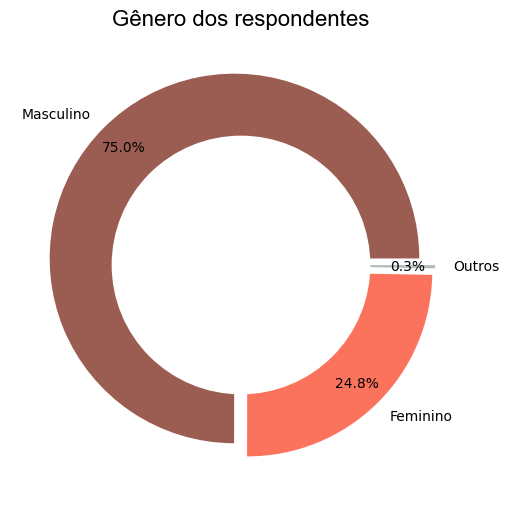

In [349]:
plt.figure(figsize=(8, 6))

genero = ['Masculino', 'Feminino', 'Outros']

colors = ['#9b5c51', '#fb735c', '#b4bcbe']
explode = (0.05, 0.05, 0.05)

# grafico pizza
plt.pie(df_genero_perc, colors=colors, labels=genero,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

# desenhando circulo
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# adicionando o círculo no gráfico de pizza
fig.gca().add_artist(centre_circle)

plt.title('Gênero dos respondentes', fontname= 'Arial', fontsize = 16)
plt.savefig('idade_genero.png', format='png')

# salva o gráfico como imagem
plt.savefig('genero.png', format='png')

plt.show()

In [303]:
# Contando o número de genero em cada faixa de idade
df_idade_genero = df_dados["(\'P1_b \', \'Genero\')"].groupby(df_dados["('P1_a_1 ', 'Faixa idade')"]).value_counts()
df_idade_genero = df_idade_genero.unstack()
df_idade_genero

"('P1_b ', 'Genero')",Feminino,Masculino,Prefiro não informar
"('P1_a_1 ', 'Faixa idade')",,,
17-21,34.0,116.0,2.0
22-24,75.0,374.0,NaN
25-29,381.0,1010.0,7.0
30-34,294.0,799.0,2.0
35-39,145.0,453.0,NaN
40-44,67.0,210.0,NaN
45-49,40.0,104.0,NaN
50-54,14.0,75.0,NaN
55+,7.0,60.0,1.0


<Figure size 800x600 with 0 Axes>

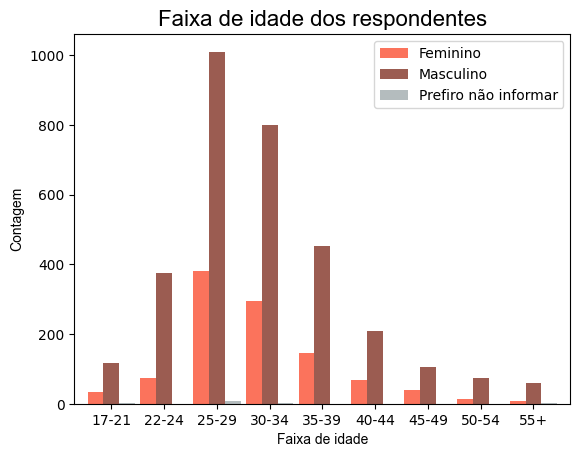

In [352]:
plt.figure(figsize=(8, 6))

df_idade_genero.plot.bar(color = ['#fb735c', '#9b5c51', '#b4bcbe'], width = 0.9)

plt.title('Faixa de idade dos respondentes', fontname= 'Arial', fontsize = 16)
plt.xlabel('Faixa de idade', fontname= 'Arial')
plt.ylabel('Contagem', fontname= 'Arial')
plt.xticks(rotation=360)
plt.legend(loc=1)

plt.savefig('idade_genero.png', format='png')
plt.show()


#### Qual a raça/etnia dos respondentes?

In [17]:
df_etnia = df_dados["(\'P1_c \', \'Cor/raca/etnia\')"].value_counts()
df_etnia

('P1_c ', 'Cor/raca/etnia')
Branca                  2743
Parda                   1054
Preta                    291
Amarela                  128
Prefiro não informar      26
Outra                     17
Indígena                  11
Name: count, dtype: int64

In [123]:
df_etnia_perc = df_dados["(\'P1_c \', \'Cor/raca/etnia\')"].value_counts(normalize=True)*100
df_etnia_perc

('P1_c ', 'Cor/raca/etnia')
Branca                  64.24
Parda                   24.68
Preta                    6.81
Amarela                  3.00
Prefiro não informar     0.61
Outra                    0.40
Indígena                 0.26
Name: proportion, dtype: float64

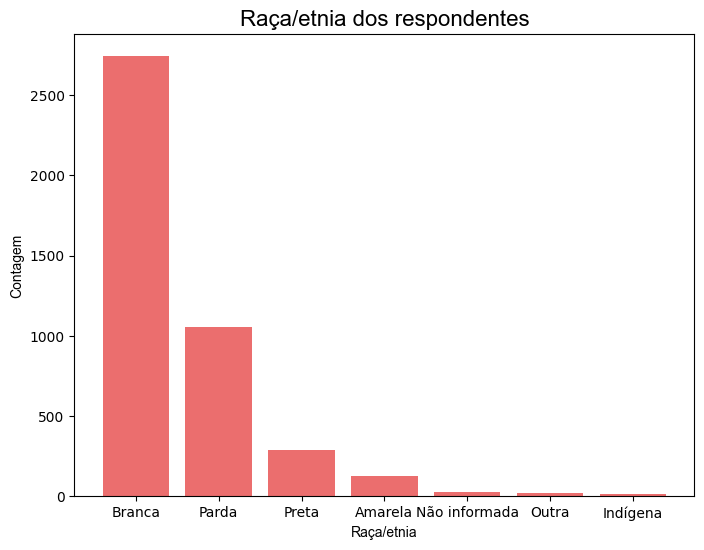

In [423]:
plt.figure(figsize=(8, 6))

etnia = ['Branca', 'Parda', 'Preta', 'Amarela', 'Não informada', 'Outra', 'Indígena']

plt.bar(etnia, df_etnia,  color = "#eb6e6e")

plt.title('Raça/etnia dos respondentes', fontname= 'Arial', fontsize = 16)
plt.xlabel('Raça/etnia', fontname= 'Arial')
plt.ylabel('Contagem', fontname= 'Arial')

plt.savefig('raca_etnia.png', format='png')
plt.show()

### Qual a região de moradia dos respondentes?

In [359]:
df_regiao = df_dados["(\'P1_i_2 \', \'Regiao onde mora\')"].value_counts()
df_regiao = df_regiao.sort_values(ascending=True)
df_regiao

('P1_i_2 ', 'Regiao onde mora')
Norte             76
Centro-oeste     222
Nordeste         562
Sul              668
Sudeste         2642
Name: count, dtype: int64

In [153]:
df_regiao_perc = df_dados["(\'P1_i_2 \', \'Regiao onde mora\')"].value_counts(normalize=True)*100
df_regiao_perc

('P1_i_2 ', 'Regiao onde mora')
Sudeste         63.36
Sul             16.02
Nordeste        13.48
Centro-oeste     5.32
Norte            1.82
Name: proportion, dtype: float64

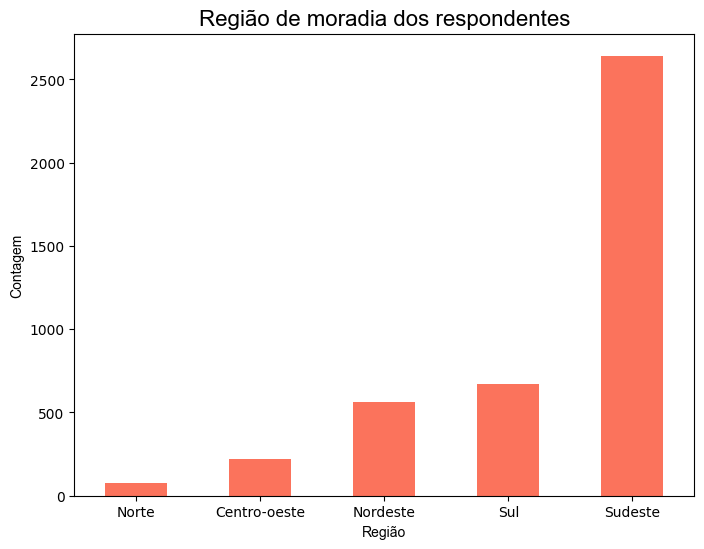

In [365]:
plt.figure(figsize=(8, 6))

df_regiao.plot.bar(color='#fb735c')

plt.title('Região de moradia dos respondentes', fontname= 'Arial', fontsize = 16)
plt.xlabel('Região', fontname= 'Arial')
plt.ylabel('Contagem', fontname= 'Arial')
plt.xticks(rotation= 360)

plt.savefig('regiao_moradia.png', format='png')
plt.show() 

#### Quais os principais estados de moradia dos respondentes?

In [367]:
df_estado = df_dados["(\'P1_i \', \'Estado onde mora\')"].value_counts()
df_estado = df_estado.head(10).sort_values(ascending=True)
df_estado

('P1_i ', 'Estado onde mora')
Ceará (CE)                  95
Pernambuco (PE)            120
Distrito Federal (DF)      132
Santa Catarina (SC)        156
Bahia (BA)                 162
Rio Grande do Sul (RS)     204
Paraná (PR)                308
Rio de Janeiro (RJ)        338
Minas Gerais (MG)          478
São Paulo (SP)            1745
Name: count, dtype: int64

In [188]:
df_estado_perc = df_dados["(\'P1_i \', \'Estado onde mora\')"].value_counts(normalize=True)*100
df_estado_perc = df_estado_perc.head(10)
df_estado_perc

('P1_i ', 'Estado onde mora')
São Paulo (SP)            42.00
Minas Gerais (MG)         11.50
Rio de Janeiro (RJ)        8.13
Paraná (PR)                7.41
Rio Grande do Sul (RS)     4.91
Bahia (BA)                 3.90
Santa Catarina (SC)        3.75
Distrito Federal (DF)      3.18
Pernambuco (PE)            2.89
Ceará (CE)                 2.29
Name: proportion, dtype: float64

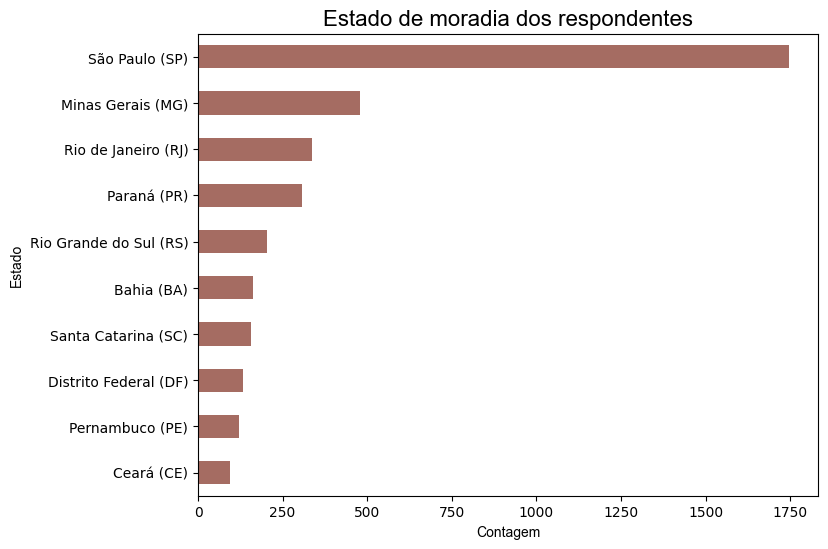

In [425]:
plt.figure(figsize=(8, 6))

df_estado.plot.barh(color='#9b5c51', alpha = 0.9)

plt.title('Estado de moradia dos respondentes', fontname= 'Arial', fontsize = 16)
plt.xlabel('Contagem', fontname= 'Arial')
plt.ylabel('Estado', fontname= 'Arial')

plt.savefig('estado_moradia.png', format='png')
plt.show() 

#### Quantos profissionais mudaram de estado por conta do trabalho?

In [23]:
df_mudanca = df_dados["(\'P1_j \', \'Mudou de Estado?\')"].value_counts()
df_mudanca

('P1_j ', 'Mudou de Estado?')
True     3362
False     808
Name: count, dtype: int64

In [202]:
df_mudanca_perc = df_dados["(\'P1_j \', \'Mudou de Estado?\')"].value_counts(normalize=True)*100
df_mudanca_perc

('P1_j ', 'Mudou de Estado?')
True     80.62
False    19.38
Name: proportion, dtype: float64

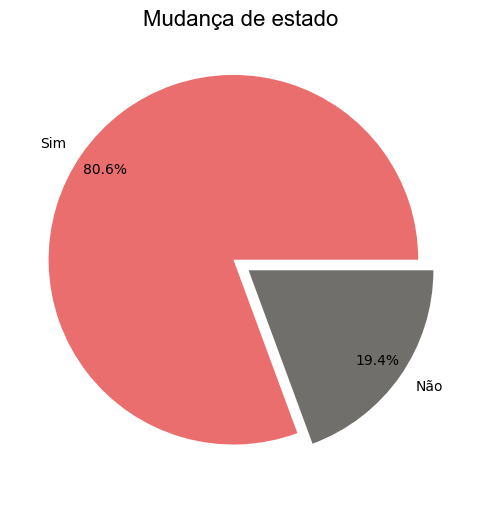

In [371]:
# montando o gráfico de genero

plt.figure(figsize=(6, 6))

mudanca = ['Sim', 'Não']

colors = ['#eb6e6e', '#706f6b']
explode = (0.05, 0.05)

# grafico pizza
plt.pie(df_mudanca_perc, colors=colors, labels=mudanca,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

plt.title('Mudança de estado', fontname= 'Arial', fontsize = 16)

plt.savefig('mudanca.png', format='png')
plt.show()

#### Qual o nível de escolaridade dos respondentes?

In [373]:
df_escolaridade = df_dados["(\'P1_l \', \'Nivel de Ensino\')"].value_counts().sort_values(ascending=True)
df_escolaridade

('P1_l ', 'Nivel de Ensino')
Prefiro não informar            12
Não tenho graduação formal     110
Doutorado ou Phd               191
Mestrado                       521
Estudante de Graduação         613
Pós-graduação                 1313
Graduação/Bacharelado         1510
Name: count, dtype: int64

In [207]:
df_escolaridade_perc = df_dados["(\'P1_l \', \'Nivel de Ensino\')"].value_counts(normalize=True)*100
df_escolaridade_perc

('P1_l ', 'Nivel de Ensino')
Graduação/Bacharelado         35.36
Pós-graduação                 30.75
Estudante de Graduação        14.36
Mestrado                      12.20
Doutorado ou Phd               4.47
Não tenho graduação formal     2.58
Prefiro não informar           0.28
Name: proportion, dtype: float64

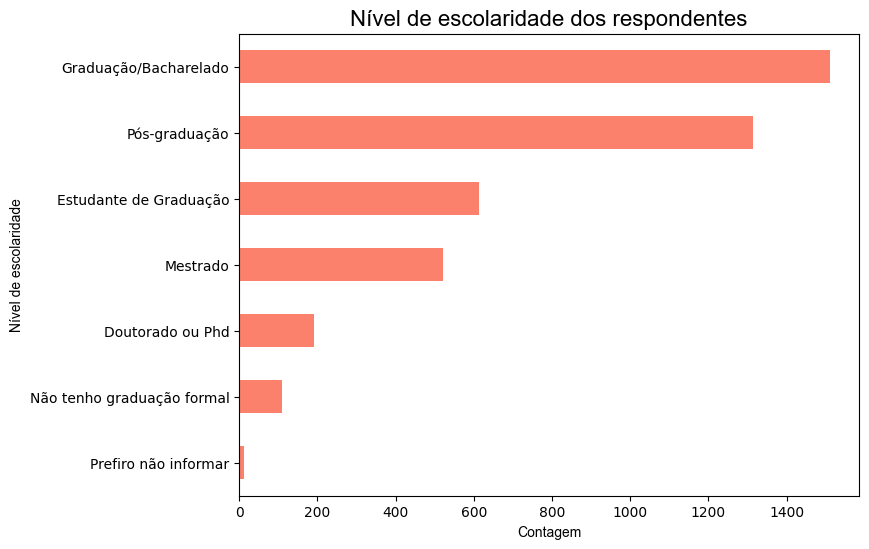

In [427]:
plt.figure(figsize=(8, 6))

df_escolaridade.plot.barh(color='#fb735c', alpha = 0.9)

plt.title('Nível de escolaridade dos respondentes', fontname= 'Arial', fontsize = 16)
plt.xlabel('Contagem', fontname= 'Arial')
plt.ylabel('Nível de escolaridade', fontname= 'Arial')

plt.savefig('escolaridade.png', format='png')
plt.show() 

#### Qual a área de formação dos respondentes?

In [378]:
df_formacao = df_dados["(\'P1_m \', \'Área de Formação\')"].value_counts().sort_values(ascending=True)
df_formacao

('P1_m ', 'Área de Formação')
Ciências Sociais                                                            74
Ciências Biológicas/ Farmácia/ Medicina/ Área da Saúde                     111
Química / Física                                                           112
Marketing / Publicidade / Comunicação / Jornalismo                         122
Outra opção                                                                200
Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais     405
Economia/ Administração / Contabilidade / Finanças/ Negócios               641
Outras Engenharias                                                         941
Computação / Engenharia de Software / Sistemas de Informação/ TI          1542
Name: count, dtype: int64

In [426]:
df_formacao_perc = df_dados["(\'P1_m \', \'Área de Formação\')"].value_counts(normalize=True)*100
df_formacao_perc

('P1_m ', 'Área de Formação')
Computação / Engenharia de Software / Sistemas de Informação/ TI          37.17
Outras Engenharias                                                        22.69
Economia/ Administração / Contabilidade / Finanças/ Negócios              15.45
Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais     9.76
Outra opção                                                                4.82
Marketing / Publicidade / Comunicação / Jornalismo                         2.94
Química / Física                                                           2.70
Ciências Biológicas/ Farmácia/ Medicina/ Área da Saúde                     2.68
Ciências Sociais                                                           1.78
Name: proportion, dtype: float64

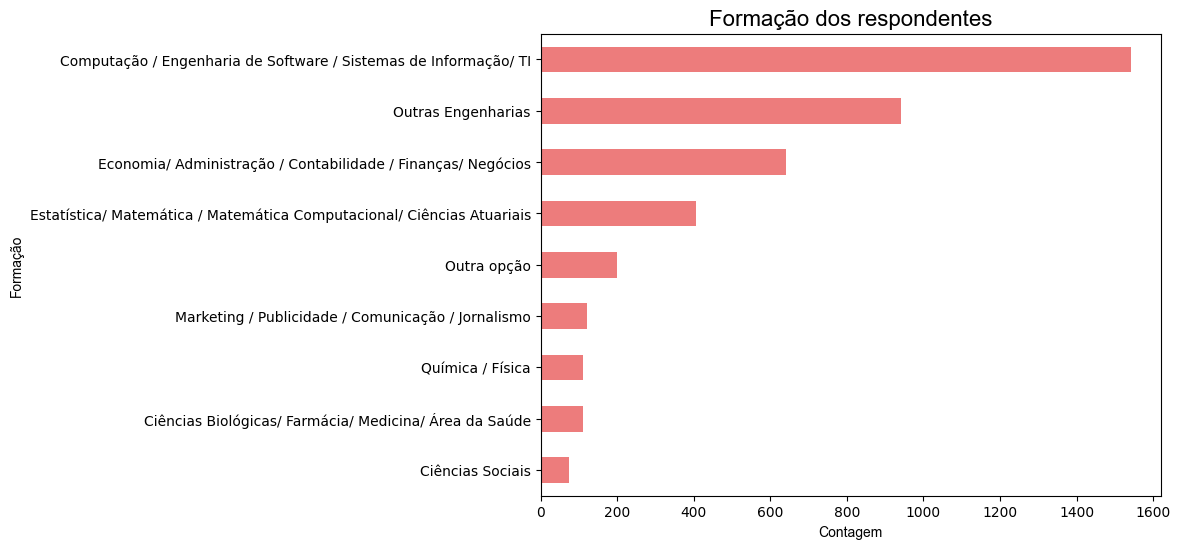

In [382]:
plt.figure(figsize=(8, 6))

df_formacao.plot.barh(color='#eb6e6e', alpha = 0.9)

plt.title('Formação dos respondentes', fontname= 'Arial', fontsize = 16)
plt.xlabel('Contagem', fontname= 'Arial')
plt.ylabel('Formação', fontname= 'Arial')

plt.savefig('formacao.png', format='png')
plt.show() 

#### Qual a situação de trabalho dos respondentes?

In [384]:
df_empregabilidade = df_dados["(\'P2_a \', \'Qual sua situação atual de trabalho?\')"].value_counts()
df_empregabilidade = df_empregabilidade.head(7).sort_values(ascending=True)
df_empregabilidade


('P2_a ', 'Qual sua situação atual de trabalho?')
Somente Estudante (graduação)               82
Trabalho na área Acadêmica/Pesquisador      86
Servidor Público                           156
Estagiário                                 188
Desempregado, buscando recolocação         350
Empreendedor ou Empregado (CNPJ)           410
Empregado (CLT)                           2761
Name: count, dtype: int64

In [225]:
df_empregabilidade_perc = df_dados["(\'P2_a \', \'Qual sua situação atual de trabalho?\')"].value_counts(normalize=True)*100
df_empregabilidade_perc = df_empregabilidade_perc.head(7)
df_empregabilidade_perc

('P2_a ', 'Qual sua situação atual de trabalho?')
Empregado (CLT)                           64.66
Empreendedor ou Empregado (CNPJ)           9.60
Desempregado, buscando recolocação         8.20
Estagiário                                 4.40
Servidor Público                           3.65
Trabalho na área Acadêmica/Pesquisador     2.01
Somente Estudante (graduação)              1.92
Name: proportion, dtype: float64

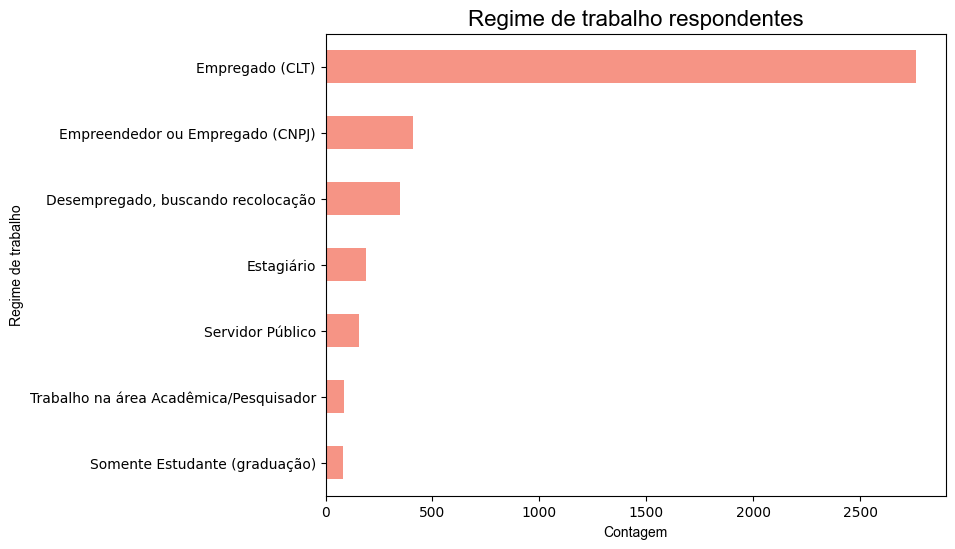

In [389]:
plt.figure(figsize=(8, 6))

df_empregabilidade.plot.barh(color='#f58978', alpha = 0.9)

plt.title('Regime de trabalho respondentes', fontname= 'Arial', fontsize = 16)
plt.xlabel('Contagem', fontname= 'Arial')
plt.ylabel('Regime de trabalho', fontname= 'Arial')

plt.savefig('regime_trabalho.png', format='png')
plt.show() 

#### Quais setores mais empregam profissionais de dados?

In [391]:
df_setor = df_dados["(\'P2_b \', \'Setor\')"].value_counts()
df_setor = df_setor.head(10).sort_values(ascending=True)
df_setor

('P2_b ', 'Setor')
Educação                          142
Setor Público                     150
Internet/Ecommerce                167
Área da Saúde                     178
Indústria                         218
Outra Opção                       269
Área de Consultoria               277
Varejo                            308
Finanças ou Bancos                600
Tecnologia/Fábrica de Software    718
Name: count, dtype: int64

In [222]:
df_setor_perc = df_dados["(\'P2_b \', \'Setor\')"].value_counts(normalize=True)*100
df_setor_perc = df_setor_perc.head(10)
df_setor_perc

('P2_b ', 'Setor')
Tecnologia/Fábrica de Software    19.44
Finanças ou Bancos                16.25
Varejo                             8.34
Área de Consultoria                7.50
Outra Opção                        7.28
Indústria                          5.90
Área da Saúde                      4.82
Internet/Ecommerce                 4.52
Setor Público                      4.06
Educação                           3.85
Name: proportion, dtype: float64

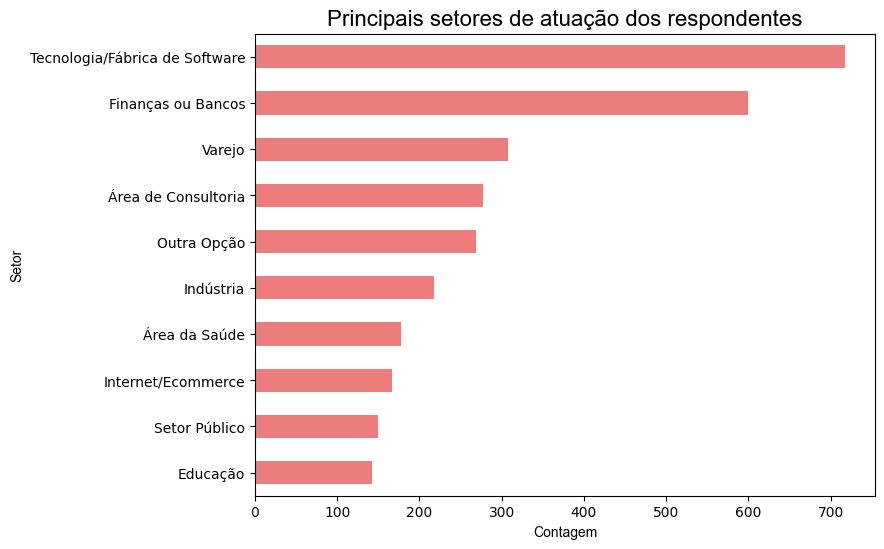

In [392]:
plt.figure(figsize=(8, 6))

df_setor.plot.barh(color='#eb6e6e', alpha = 0.9)

plt.title('Principais setores de atuação dos respondentes', fontname= 'Arial', fontsize = 16)
plt.xlabel('Contagem', fontname= 'Arial')
plt.ylabel('Setor', fontname= 'Arial')

plt.savefig('setores.png', format='png')
plt.show() 

#### Quais os principais cargos na área de dados?

In [393]:
df_cargo = df_dados["(\'P2_f \', \'Cargo Atual\')"].value_counts()
df_cargo = df_cargo.head(10).sort_values(ascending=True)
df_cargo

('P2_f ', 'Cargo Atual')
Engenheiro de Machine Learning/ML Engineer                              69
Analytics Engineer                                                      70
Analista de Suporte/Analista Técnico                                    72
Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas            106
Analista de Negócios/Business Analyst                                  123
Outra Opção                                                            281
Analista de BI/BI Analyst                                              378
Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect    490
Cientista de Dados/Data Scientist                                      556
Analista de Dados/Data Analyst                                         639
Name: count, dtype: int64

In [221]:
df_cargo_perc = df_dados["(\'P2_f \', \'Cargo Atual\')"].value_counts(normalize=True)*100
df_cargo_perc = df_cargo_perc.head(10)
df_cargo_perc

('P2_f ', 'Cargo Atual')
Analista de Dados/Data Analyst                                         21.44
Cientista de Dados/Data Scientist                                      18.65
Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect    16.44
Analista de BI/BI Analyst                                              12.68
Outra Opção                                                             9.43
Analista de Negócios/Business Analyst                                   4.13
Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas             3.56
Analista de Suporte/Analista Técnico                                    2.42
Analytics Engineer                                                      2.35
Engenheiro de Machine Learning/ML Engineer                              2.31
Name: proportion, dtype: float64

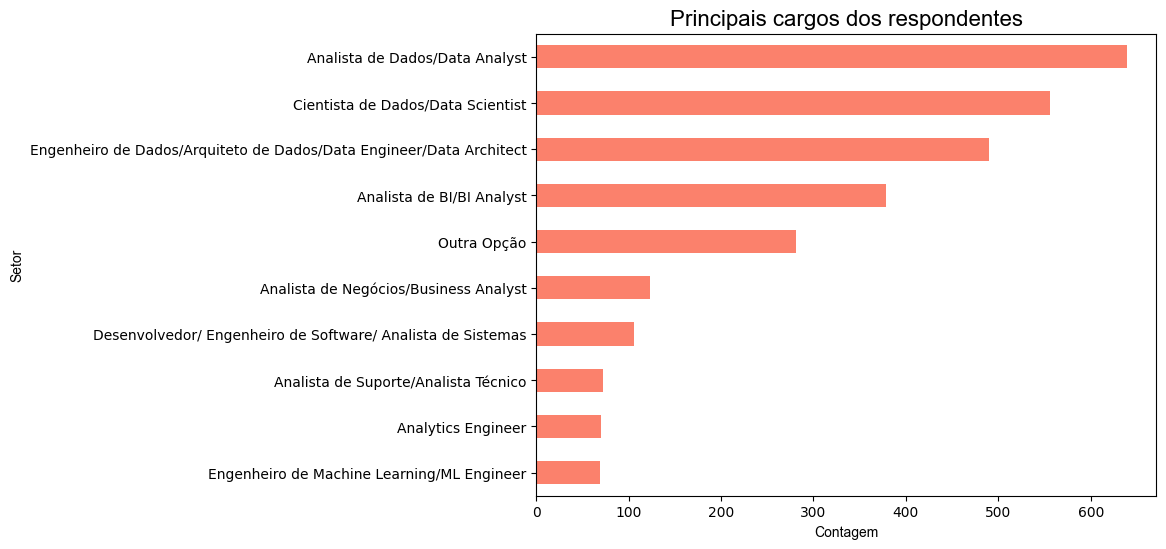

In [395]:
plt.figure(figsize=(8, 6))

df_cargo.plot.barh(color='#fb735c', alpha = 0.9)

plt.title('Principais cargos dos respondentes', fontname= 'Arial', fontsize = 16)
plt.xlabel('Contagem', fontname= 'Arial')
plt.ylabel('Setor', fontname= 'Arial')

plt.savefig('cargos.png', format='png')
plt.show() 

#### Qual o nível de senioridade dos cargos dos respondentes?

In [35]:
df_nivel = df_dados["(\'P2_g \', \'Nivel\')"].value_counts()
df_nivel

('P2_g ', 'Nivel')
Pleno     1060
Júnior    1023
Sênior     898
Name: count, dtype: int64

In [227]:
df_nivel_perc = df_dados["(\'P2_g \', \'Nivel\')"].value_counts(normalize=True)*100
df_nivel_perc

('P2_g ', 'Nivel')
Pleno     35.56
Júnior    34.32
Sênior    30.12
Name: proportion, dtype: float64

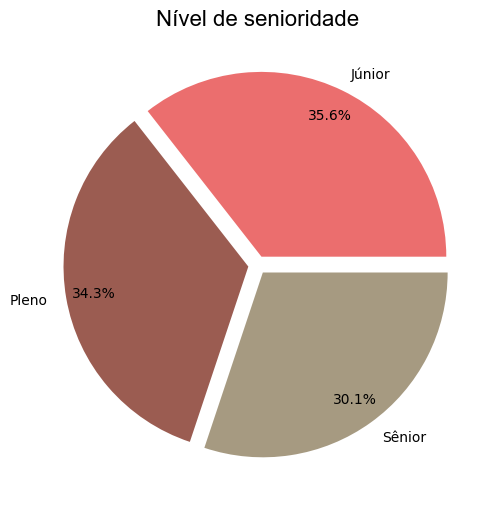

In [428]:
plt.figure(figsize=(6, 6))

nivel = ['Júnior', 'Pleno', 'Sênior']

colors = ['#eb6e6e', '#9b5c51', '#a69a81']
explode = (0.05, 0.05, 0.05)

# grafico pizza
plt.pie(df_nivel_perc, colors=colors, labels=nivel,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

plt.title('Nível de senioridade', fontname= 'Arial', fontsize = 16)

plt.savefig('nivel_cargo.png', format='png')
plt.show()

#### Qual a faixa salarial dos respondentes?

In [398]:
df_salarios = df_dados["(\'P2_h \', \'Faixa salarial\')"].value_counts().sort_values(ascending=True)
df_salarios

('P2_h ', 'Faixa salarial')
Menos de R$ 1.000/mês                35
Acima de R$ 40.001/mês               45
de R$ 30.001/mês a R$ 40.000/mês     70
de R$ 25.001/mês a R$ 30.000/mês     77
de R$ 20.001/mês a R$ 25.000/mês    133
de R$ 1.001/mês a R$ 2.000/mês      216
de R$ 16.001/mês a R$ 20.000/mês    229
de R$ 2.001/mês a R$ 3.000/mês      285
de R$ 3.001/mês a R$ 4.000/mês      303
de R$ 12.001/mês a R$ 16.000/mês    437
de R$ 6.001/mês a R$ 8.000/mês      527
de R$ 4.001/mês a R$ 6.000/mês      584
de R$ 8.001/mês a R$ 12.000/mês     752
Name: count, dtype: int64

In [233]:
df_salarios_perc = df_dados["(\'P2_h \', \'Faixa salarial\')"].value_counts(normalize=True)*100
df_salarios_perc

('P2_h ', 'Faixa salarial')
de R$ 8.001/mês a R$ 12.000/mês     20.36
de R$ 4.001/mês a R$ 6.000/mês      15.81
de R$ 6.001/mês a R$ 8.000/mês      14.27
de R$ 12.001/mês a R$ 16.000/mês    11.83
de R$ 3.001/mês a R$ 4.000/mês       8.20
de R$ 2.001/mês a R$ 3.000/mês       7.72
de R$ 16.001/mês a R$ 20.000/mês     6.20
de R$ 1.001/mês a R$ 2.000/mês       5.85
de R$ 20.001/mês a R$ 25.000/mês     3.60
de R$ 25.001/mês a R$ 30.000/mês     2.09
de R$ 30.001/mês a R$ 40.000/mês     1.90
Acima de R$ 40.001/mês               1.22
Menos de R$ 1.000/mês                0.95
Name: proportion, dtype: float64

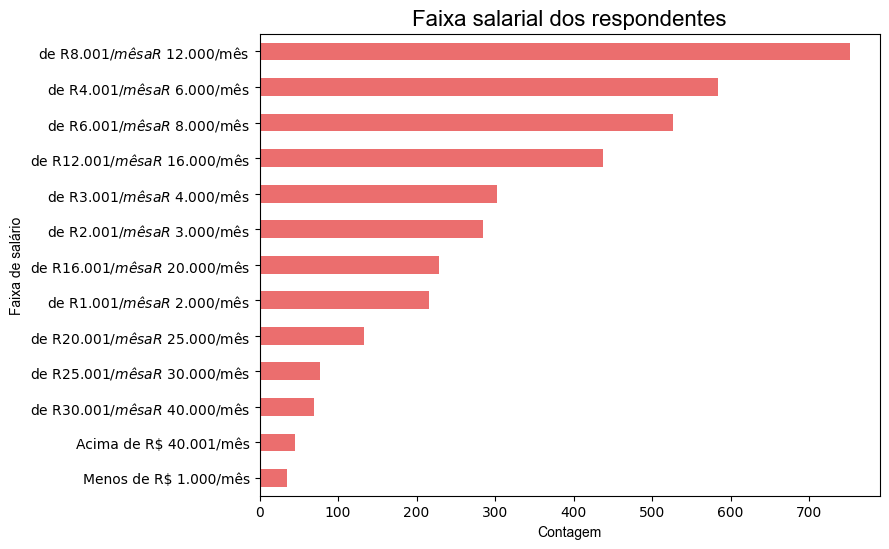

In [401]:
plt.figure(figsize=(8, 6))

df_salarios.plot.barh(color='#eb6e6e')

plt.title('Faixa salarial dos respondentes', fontname= 'Arial', fontsize = 16)
plt.xlabel('Contagem', fontname= 'Arial')
plt.ylabel('Faixa de salário', fontname= 'Arial')

plt.savefig('salario.png', format='png')
plt.show() 

#### Qual o tempo de experiência dos respondentes na área de dados?

In [402]:
df_experiencia = df_dados["(\'P2_i \', \'Quanto tempo de experiência na área de dados você tem?\')"].value_counts()
df_experiencia = df_experiencia.sort_values(ascending=True)
df_experiencia

('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')
Não tenho experiência na área de dados    188
de 7 a 10 anos                            294
Mais de 10 anos                           402
de 4 a 6 anos                             522
Menos de 1 ano                            596
de 3 a 4 anos                             711
de 1 a 2 anos                             980
Name: count, dtype: int64

In [235]:
df_experiencia_perc = df_dados["(\'P2_i \', \'Quanto tempo de experiência na área de dados você tem?\')"].value_counts(normalize=True)*100
df_experiencia_perc

('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')
de 1 a 2 anos                             26.54
de 3 a 4 anos                             19.25
Menos de 1 ano                            16.14
de 4 a 6 anos                             14.13
Mais de 10 anos                           10.89
de 7 a 10 anos                             7.96
Não tenho experiência na área de dados     5.09
Name: proportion, dtype: float64

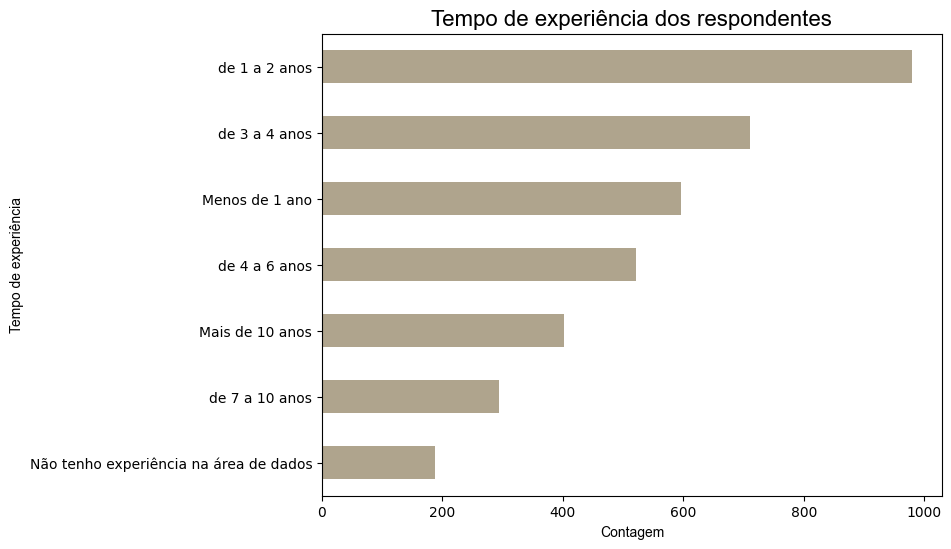

In [405]:
plt.figure(figsize=(8, 6))

df_experiencia.plot.barh(color='#a69a81', alpha = 0.9)

plt.title('Tempo de experiência dos respondentes', fontname= 'Arial', fontsize = 16)
plt.xlabel('Contagem', fontname= 'Arial')
plt.ylabel('Tempo de experiência', fontname= 'Arial')

plt.savefig('experiência.png', format='png')
plt.show() 

#### Os respondentes tem experiência anterior na área de TI?

In [41]:
df_experiencia_ti = df_dados["(\'P2_j \', \'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?\')"].value_counts()
df_experiencia_ti

('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')
Não tive experiência na área de TI/Engenharia de Software antes de começar a trabalhar na área de dados    1605
Menos de 1 ano                                                                                              734
de 1 a 2 anos                                                                                               468
de 3 a 4 anos                                                                                               306
Mais de 10 anos                                                                                             264
de 5 a 6 anos                                                                                               160
de 7 a 10 anos                                                                                              156
Name: count, dtype: int64

#### Os profissionais respondentes estão satisfeitos com os seus trabalhos?

In [43]:
df_satisfacao = df_dados["(\'P2_k \', \'Você está satisfeito na sua empresa atual?\')"].value_counts()
df_satisfacao

('P2_k ', 'Você está satisfeito na sua empresa atual?')
True     2733
False     960
Name: count, dtype: int64

In [238]:
df_satisfacao_perc = df_dados["(\'P2_k \', \'Você está satisfeito na sua empresa atual?\')"].value_counts(normalize=True)*100
df_satisfacao_perc

('P2_k ', 'Você está satisfeito na sua empresa atual?')
True     74.0
False    26.0
Name: proportion, dtype: float64

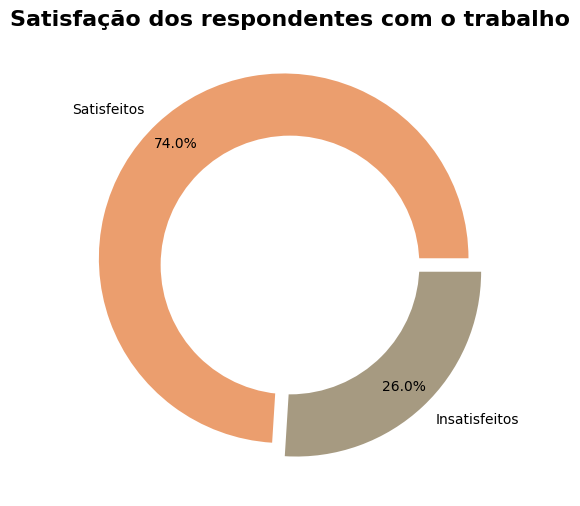

In [409]:
plt.figure(figsize=(6, 6))

satisfacao = ['Satisfeitos', 'Insatisfeitos']

colors = ['#eb9e6e', '#a69a81']
explode = (0.05, 0.05)

plt.pie(df_satisfacao_perc, colors=colors, labels=satisfacao,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
fig.gca().add_artist(centre_circle)

plt.title('Satisfação dos respondentes com o trabalho', fontsize = 16, weight='bold')

plt.savefig('satisfacao.png', format='png')
plt.show()

#### Qual a forma de trabalho predominante entre os respondentes?

In [45]:
df_trabalho = df_dados["(\'P2_p \', \'Atualmente qual a sua forma de trabalho?\')"].value_counts()
df_trabalho

('P2_p ', 'Atualmente qual a sua forma de trabalho?')
Modelo 100% remoto                                                                                                1688
Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)     946
Modelo 100% presencial                                                                                             582
Modelo híbrido com dias fixos de trabalho presencial                                                               477
Name: count, dtype: int64

In [240]:
df_trabalho_perc = df_dados["(\'P2_p \', \'Atualmente qual a sua forma de trabalho?\')"].value_counts(normalize=True)*100
df_trabalho_perc

('P2_p ', 'Atualmente qual a sua forma de trabalho?')
Modelo 100% remoto                                                                                                45.71
Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)    25.62
Modelo 100% presencial                                                                                            15.76
Modelo híbrido com dias fixos de trabalho presencial                                                              12.92
Name: proportion, dtype: float64

#### Quais são as linguagens de programação mais utilizadas pelos respondentes no trabalho?

In [410]:
df_linguagens_trab = df_dados["('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')"].value_counts()
df_linguagens_trab = df_linguagens_trab.head(5).sort_values(ascending=True)
df_linguagens_trab

('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')
Visual Basic/VBA             56
R                           113
Não utiliza programação     325
Python                     1136
SQL                        1245
Name: count, dtype: int64

In [243]:
df_linguagens_trab_perc = df_dados["('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')"].value_counts(normalize=True)*100
df_linguagens_trab_perc = df_linguagens_trab_perc.head(5)
df_linguagens_trab_perc

('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')
SQL                        41.76
Python                     38.11
Não utiliza programação    10.90
R                           3.79
Visual Basic/VBA            1.88
Name: proportion, dtype: float64

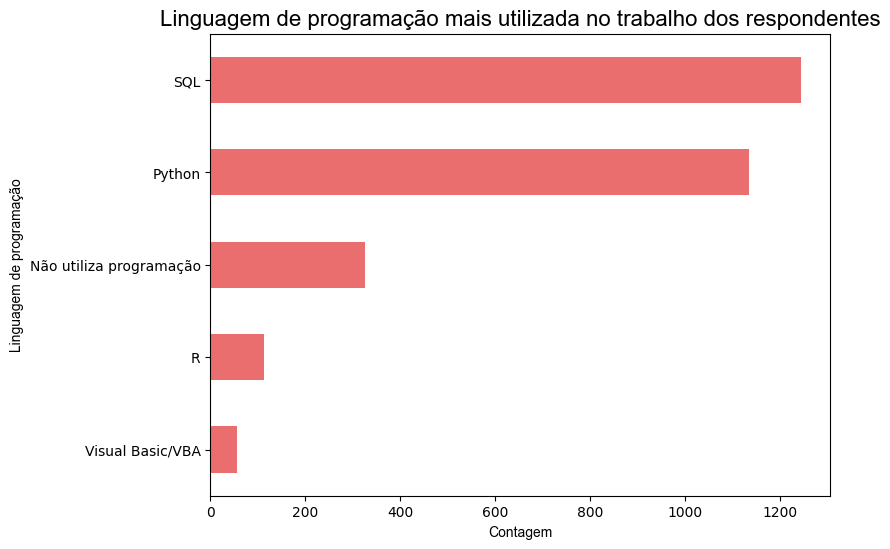

In [412]:
plt.figure(figsize=(8, 6))

df_linguagens_trab.plot.barh(color='#eb6e6e')

plt.title('Linguagem de programação mais utilizada no trabalho dos respondentes', fontname= 'Arial', fontsize = 16)
plt.xlabel('Contagem', fontname= 'Arial')
plt.ylabel('Linguagem de programação', fontname= 'Arial')

plt.savefig('ling_trabalho.png', format='png')
plt.show()

#### Quais são as linguagens de programação preferidas dos respondentes?

In [413]:
df_linguagem_fav = df_dados["('P4_f ', 'Entre as linguagens listadas abaixo, qual é a sua preferida?')"].value_counts()
df_linguagem_fav = df_linguagem_fav.head(5).sort_values(ascending=True)
df_linguagem_fav

('P4_f ', 'Entre as linguagens listadas abaixo, qual é a sua preferida?')
C/C++/C#      25
SQL           28
Scala         35
R            248
Python      2581
Name: count, dtype: int64

In [250]:
df_linguagem_fav_perc = df_dados["('P4_f ', 'Entre as linguagens listadas abaixo, qual é a sua preferida?')"].value_counts(normalize=True)*100
df_linguagem_fav_perc = df_linguagem_fav_perc.head(4)
df_linguagem_fav_perc

('P4_f ', 'Entre as linguagens listadas abaixo, qual é a sua preferida?')
Python    86.64
R          8.32
Scala      1.17
SQL        0.94
Name: proportion, dtype: float64

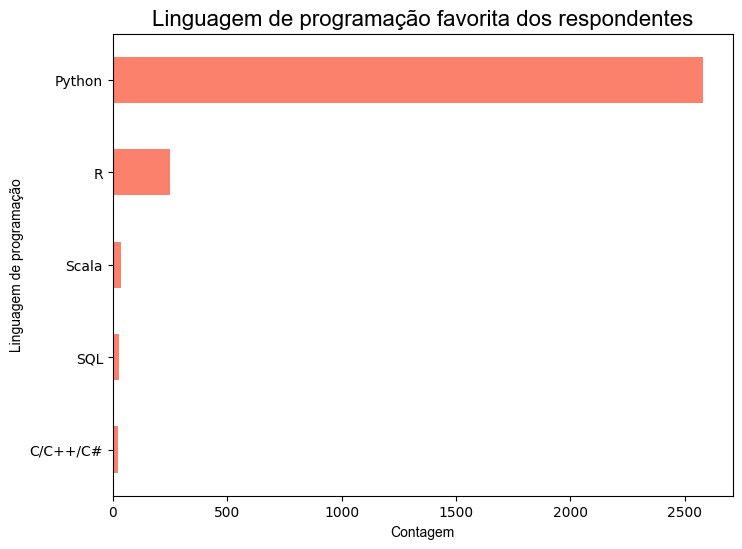

In [415]:
plt.figure(figsize=(8, 6))

df_linguagem_fav.plot.barh(color='#fb735c', alpha = 0.9)

plt.title('Linguagem de programação favorita dos respondentes', fontname= 'Arial', fontsize = 16)
plt.xlabel('Contagem', fontname= 'Arial')
plt.ylabel('Linguagem de programação', fontname= 'Arial')

plt.savefig('ling_favorita.png', format='png')
plt.show()

#### Quais os serviços de Cloud mais utilizados no trabalho pelos respondentes?

In [417]:
df_cloud_trab = df_dados["('P4_g ', 'Quais das opções de Cloud listadas abaixo você utiliza no trabalho?')"].value_counts()
df_cloud_trab = df_cloud_trab.head(5).sort_values(ascending=True)
df_cloud_trab

('P4_g ', 'Quais das opções de Cloud listadas abaixo você utiliza no trabalho?')
Cloud Própria                                 114
Servidores On Premise/Não utilizamos Cloud    271
Azure (Microsoft)                             470
Google Cloud (GCP)                            495
Amazon Web Services (AWS)                     709
Name: count, dtype: int64

In [258]:
df_cloud_trab_perc = df_dados["('P4_g ', 'Quais das opções de Cloud listadas abaixo você utiliza no trabalho?')"].value_counts(normalize=True)*100
df_cloud_trab_perc = df_cloud_trab_perc.head(5)
df_cloud_trab_perc

('P4_g ', 'Quais das opções de Cloud listadas abaixo você utiliza no trabalho?')
Amazon Web Services (AWS)                     23.82
Google Cloud (GCP)                            16.63
Azure (Microsoft)                             15.79
Servidores On Premise/Não utilizamos Cloud     9.11
Cloud Própria                                  3.83
Name: proportion, dtype: float64

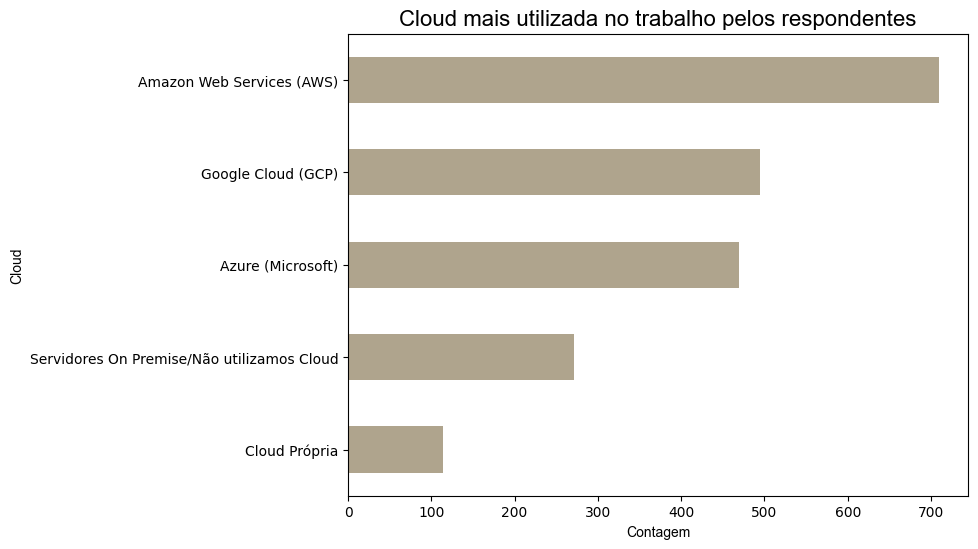

In [429]:
plt.figure(figsize=(8, 6))

df_cloud_trab.plot.barh(color='#a69a81', alpha = 0.9)

plt.title('Cloud mais utilizada no trabalho pelos respondentes', fontname= 'Arial', fontsize = 16)
plt.xlabel('Contagem', fontname= 'Arial')
plt.ylabel('Cloud', fontname= 'Arial')

plt.savefig('cloud_trabalho.png', format='png')
plt.show()

### Quais os serviços de Cloud preferidos dos respondentes?

In [420]:
df_cloud_fav = df_dados["('P4_h ', 'Dentre as opções listadas, qual sua Cloud preferida?')"].value_counts()
df_cloud_fav = df_cloud_fav.sort_values(ascending=True)
df_cloud_fav

('P4_h ', 'Dentre as opções listadas, qual sua Cloud preferida?')
Outra Cloud                     8
Azure (Microsoft)             546
Não sei opinar                553
Google Cloud (GCP)            721
Amazon Web Services (AWS)    1153
Name: count, dtype: int64

In [257]:
df_cloud_fav_perc = df_dados["('P4_h ', 'Dentre as opções listadas, qual sua Cloud preferida?')"].value_counts(normalize=True)*100
df_cloud_fav_perc

('P4_h ', 'Dentre as opções listadas, qual sua Cloud preferida?')
Amazon Web Services (AWS)    38.68
Google Cloud (GCP)           24.19
Não sei opinar               18.55
Azure (Microsoft)            18.32
Outra Cloud                   0.27
Name: proportion, dtype: float64

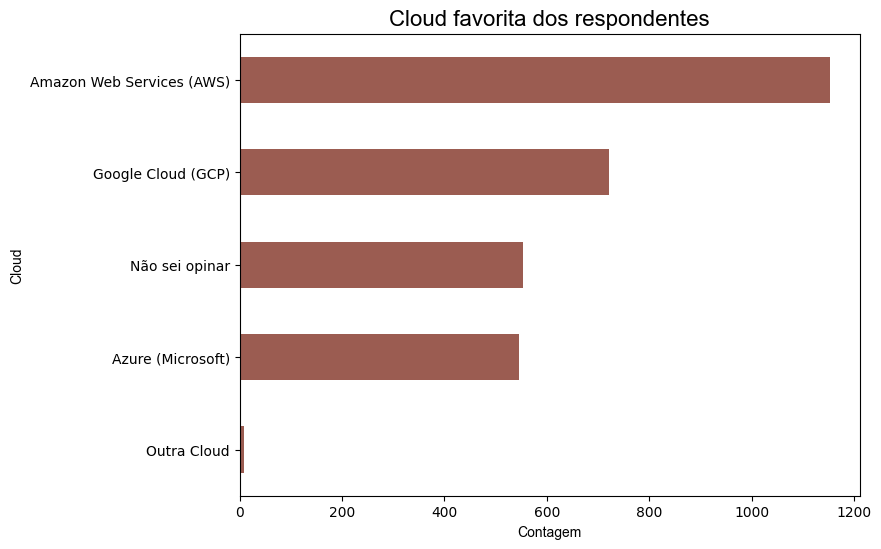

In [422]:
plt.figure(figsize=(8, 6))

df_cloud_fav.plot.barh(color='#9b5c51')

plt.title('Cloud favorita dos respondentes', fontname= 'Arial', fontsize = 16)
plt.xlabel('Contagem', fontname= 'Arial')
plt.ylabel('Cloud', fontname= 'Arial')

plt.savefig('cloud_favorita.png', format='png')
plt.show()